# Heart disease classification e2e project

1. Problem definition
2. Data
3. Evaluation
4. Feature
5. Modelling
6. Experimentation

## 1. problem definition
> Given clinical parameters, can we predict whether they have heart disease?

## 2. data
https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

## 3. evalation (define PoC success criteria)
if we can reach 95% accuracy, we will then further pursuit the project

## 4. features
**data dictionary**
* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
* The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

In [54]:
# prepare the tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [55]:
# choose the right estimator
# https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model evaluations
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, plot_roc_curve

## load data

In [56]:
df = pd.read_csv('data/heart-disease.csv')
df.shape

(303, 14)

## explore data

try to become SME of the data

1. what question are you going to solve
2. what kind of data do we have (num or category)
3. missing data? and how to deal with it
4. outliers? and how to deal with it
5. how can you add, change or delete to get more out of your data

In [57]:
# find whether it is a balanced data
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

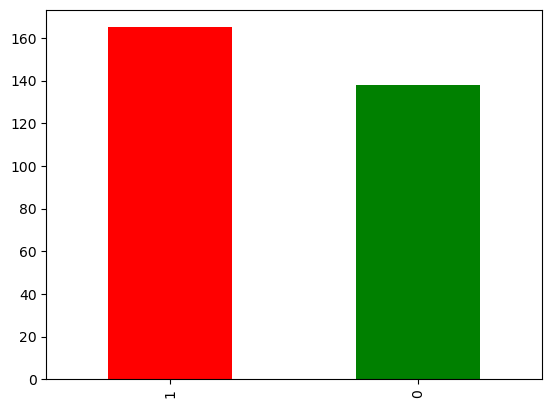

In [58]:
# to let others easily understand
df.target.value_counts().plot(kind='bar', color=['red','green']);

In [59]:
# are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [61]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### heart disease frequency to Sex

In [62]:
# male is significantly larger than femal
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [63]:
# compare sex to target
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

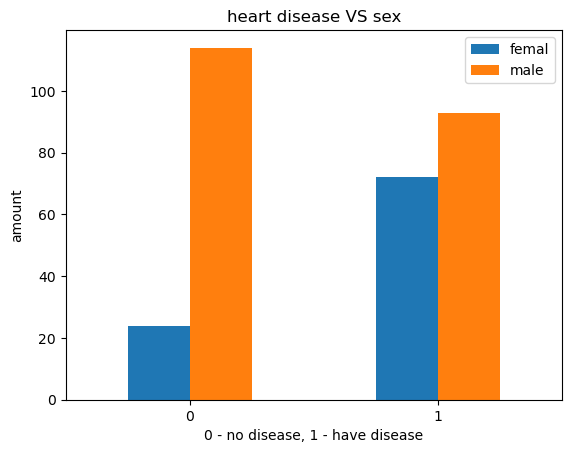

In [64]:
# plot
pd.crosstab(df.target, df.sex).plot(kind='bar')
plt.legend(['femal', 'male'])
plt.xlabel('0 - no disease, 1 - have disease')
plt.ylabel('amount')
plt.title('heart disease VS sex')
plt.xticks(rotation=0)

### age vs max heart rate for heart disease

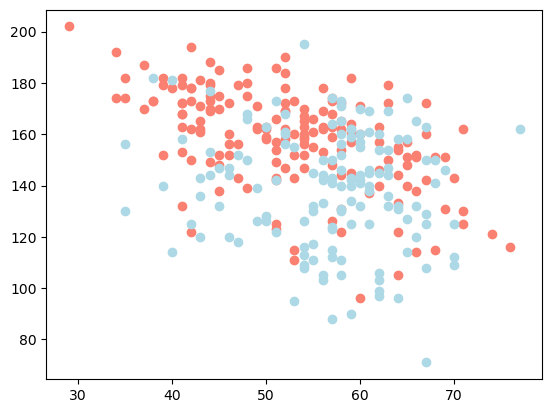

In [65]:
# scatter with positive samples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           color='salmon')

# scatter with negative samples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           color='lightblue')

<AxesSubplot:>

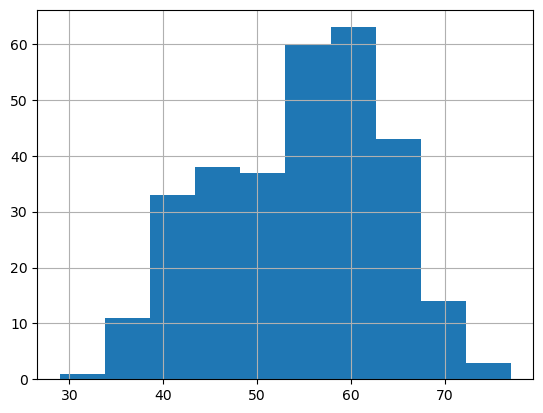

In [66]:
# check distribution of age, to figure out the outliers
df.age.hist()

In [67]:
# chest pain compare to target
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


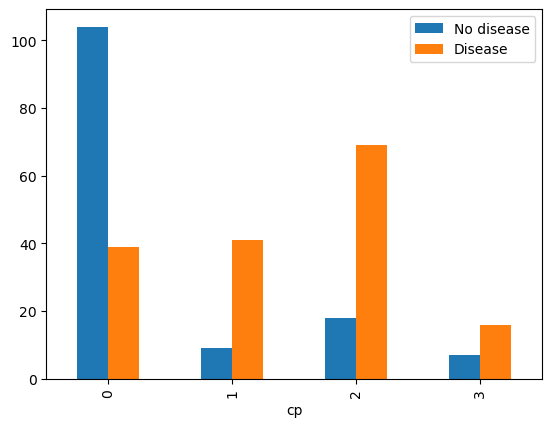

In [68]:
pd.crosstab(df.cp, df.target).plot(kind='bar')
plt.legend(['No disease', 'Disease'])

In [69]:
# make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


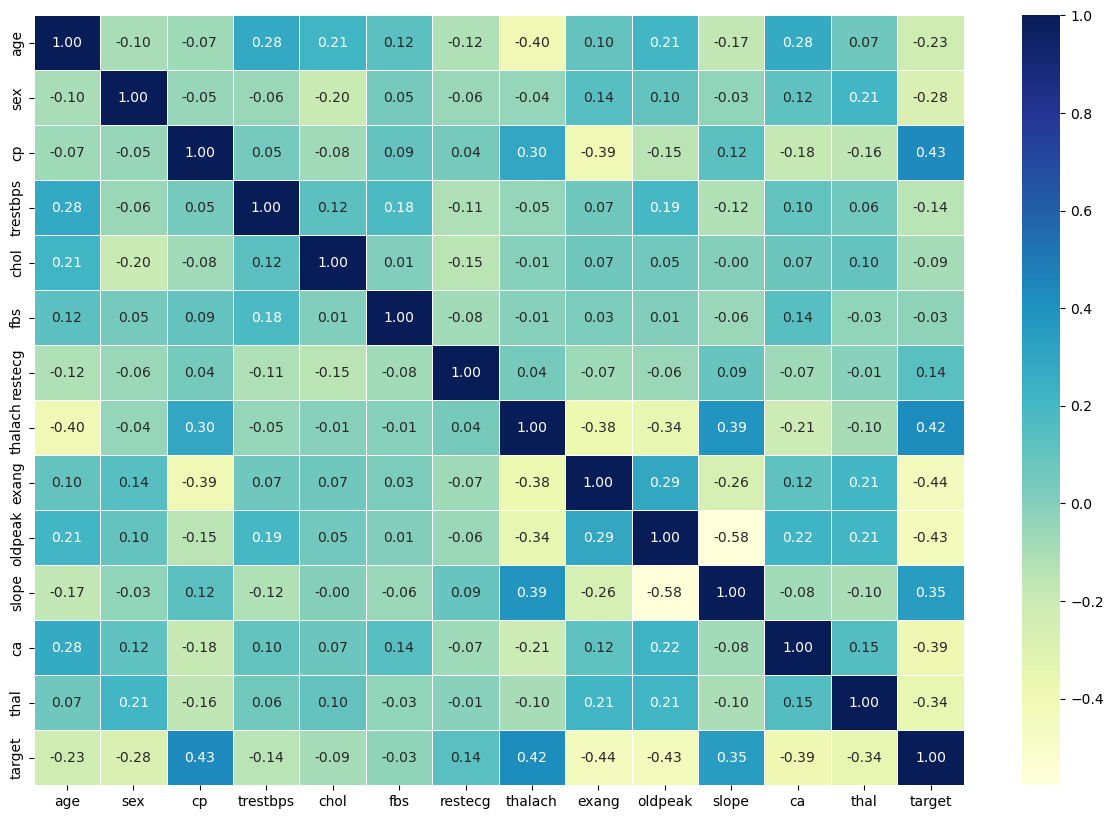

In [71]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(df.corr(),
                fmt='.2f',
                annot=True,
                linewidths=0.5,
                cmap='YlGnBu')

## 5. modelling

In [73]:
# split data
X = df.drop(columns=['target'])
y = df.target

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


we are going to try 3 different models
1. Logistic regression
2. K nearest neibours
3. randomForrest

In [76]:
# put models in a dic so that we can use func to all
models = {
    'logistic regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'random forrest': RandomForestClassifier()
}

# create a function to fit and score models

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluate given models(in dictionary format)
    return: a dictionary with each model's score
    """
    np.random.seed(42)
    result = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        result[name] = score
        
    return result

In [78]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

/Users/mikeqiu/code/ml/sample_project/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'logistic regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'random forrest': 0.8360655737704918}

### compare models

In [80]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare

,logistic regression,KNN,random forrest
accuracy,0.885246,0.688525,0.836066


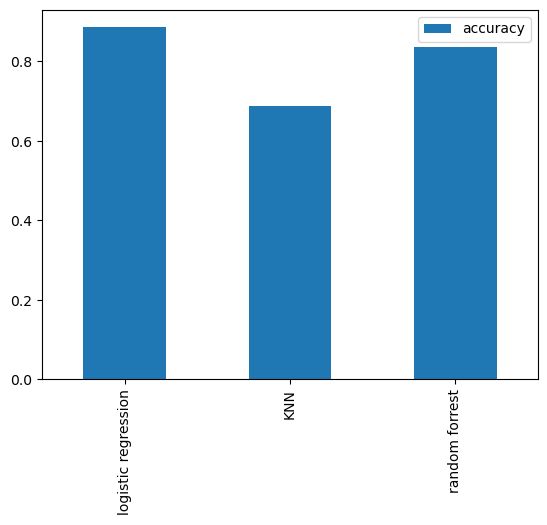

In [84]:
model_compare.T.plot(kind='bar');